In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('minutes_and_certificates.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           658 non-null    int64  
 1   minutes_watched      658 non-null    float64
 2   certificates_issued  658 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 15.5 KB


In [4]:
df.head()

,student_id,minutes_watched,certificates_issued
0,6,148.12,1
1,182,2018.87,7
2,801,6066.00,13
3,841,1623.63,3
4,862,1145.65,1


In [5]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
student_id,658.000000,211208.088146,84231.181668,6.000000,165566.750000,257267.500000,269534.750000,279766.000000
minutes_watched,658.000000,877.773754,846.600006,0.000000,330.800000,629.590000,1179.067500,6464.820000
certificates_issued,658.000000,2.661094,2.863571,1.000000,1.000000,2.000000,3.000000,35.000000


In [6]:
# drop unwanted column `student_id`
df = df.drop(columns='student_id')

# Modelling

In [31]:
# define target and predicting variables
# since we are predicting y based on only one featurue, we need to reshape it as 2D array

X = df[['minutes_watched']]  # ensure X is a 2D array
y = df['certificates_issued']

In [32]:
# split data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# fit the model
model = LinearRegression(n_jobs=-1)

model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [34]:
# get the interception and the coefficient of the model
model.intercept_, model.coef_

(1.2906568291230498, array([0.00146215]))

In [47]:
# get the coefficient of determination r2
model.score(X_train,y_train)

0.24026809272839034

In [36]:
# predict on test set
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Value')

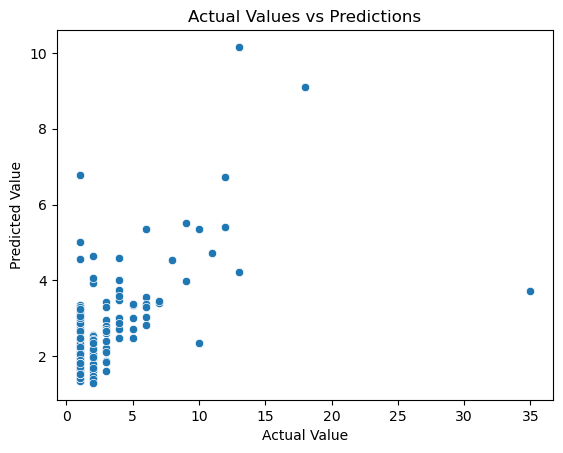

In [46]:
# visualize predictions and the actual y test
sns.scatterplot(x=y_test,
                y=y_pred)

plt.title('Actual Values vs Predictions')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

The points are scattered, showing a lack of a clear linear pattern. Ideally, if the model predictions were perfect, all points would lie on the 45-degree line where the predicted value equals the actual value. The dispersion of points away from the 45-degree line suggests that the model is not highly accurate. The predictions do not consistently align with the actual values.
- There is a high concentration of points in the lower ranges of the actual values (0 to 5), indicating that many actual values are clustered in this range.
- Predicted values also show a concentration in the lower range (0 to 5), but there are some predicted values that are much higher than the corresponding actual values.
- There are noticeable outliers where the actual values are much higher (up to 35), but the corresponding predicted values are considerably lower (around 10). This indicates the model's limitations in capturing high actual values accurately.
- Some predicted values are high (up to 10) even when the actual values are relatively low, suggesting overestimation by the model in some cases.

# Conclusion

The resulted $R^2$ is 0.24027, which suggests that about 24% of the variability in the target feature (the number of certificates issued) is explained by the predicting feature (the number of total minutes watched). In other words, our model does not account for the rest 70% of variance. The relationship between the target feature and the predicting feature might not be linear. 

The insights we got from this result is that other factors also have influences in the number of certificates issued. One of these factors can be the varying durations of different courses. For instance, a student who completes two short courses will receive two certificates, whereas a student who completes one long course - equivalent in length to the two short courses - will only receive one certificate. Another factor to consider is that some students might pass exams without watching the course videos. This could be because they already possess prior knowledge in the subject matter and are only seeking a certification to validate their expertise.

Thus, while the model offeres some understanding of the link between minutes watched and the number of certificates issued, it still leaves a significant of variance unexplained. Including the number of minutes watched is a resonable predictor for the target variable, but it should not be the only factor taken into account, to improve the model performance, we should collect and include more features.